In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
df=pd.read_excel(r'C:\Users\Siddharth\Desktop\Final_Train.xlsx')

In [125]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [126]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [127]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [128]:
from sklearn.impute import SimpleImputer

In [129]:
imp=SimpleImputer(strategy='most_frequent')

In [130]:
for col in ['Rating','Miscellaneous_Info','Place']:
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))

In [131]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [132]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [133]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
le=LabelEncoder()

In [136]:
for col in ['Qualification','Experience','Rating','Place','Profile','Miscellaneous_Info']:
    df[col]=le.fit_transform(df[col])

In [137]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0,299,5,130,100
1,73,3,49,866,0,1422,350
2,1135,63,0,457,3,1595,300
3,464,3,0,68,0,1695,250
4,10,12,0,337,0,253,250


In [138]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,414.368059,2.441872,1573.343902,307.944640
std,413.842446,20.937163,21.137633,258.547684,1.658014,640.388185,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,15.000000,0.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,42.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,2997.000000,950.000000


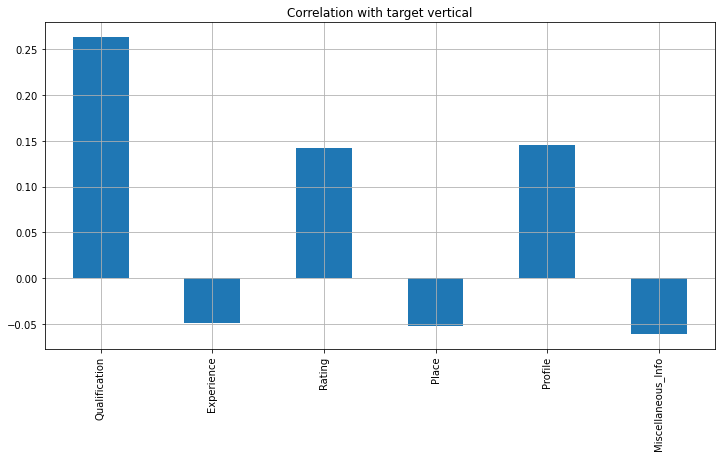

In [139]:
plt.figure(figsize=(12,6))
df.drop('Fees',axis=1).corrwith(df['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('Correlation with target vertical')
plt.show()

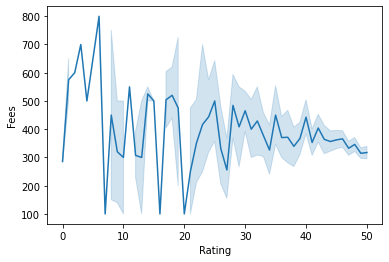

In [140]:
sns.lineplot(x='Rating',y='Fees',data=df)

Qualification            AxesSubplot(0.125,0.657941;0.227941x0.222059)
Experience            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Rating                AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Place                    AxesSubplot(0.125,0.391471;0.227941x0.222059)
Profile               AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Miscellaneous_Info    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fees                        AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

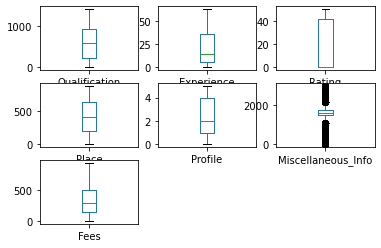

In [141]:
df.plot(kind='box',subplots=True,layout=(3,3))

In [142]:
from scipy.stats import zscore

In [143]:
z=np.abs(zscore(df))
z

array([[4.73305738e-01, 3.34882629e-01, 6.87653037e-01, ...,
        1.54301587e+00, 2.25404687e+00, 1.08926083e+00],
       [1.26594438e+00, 9.55840219e-01, 1.63068173e+00, ...,
        1.47289258e+00, 2.36351328e-01, 2.20295441e-01],
       [1.30046489e+00, 1.91011789e+00, 6.87653037e-01, ...,
        3.36652489e-01, 3.38199785e-02, 4.16158134e-02],
       ...,
       [2.07239780e-03, 5.72670771e-01, 1.58336878e+00, ...,
        9.39834180e-01, 6.25210608e-01, 1.52985171e+00],
       [8.36481290e-01, 8.12542314e-01, 1.25217810e+00, ...,
        9.39834180e-01, 9.81762078e-01, 1.08926083e+00],
       [8.55125573e-01, 7.17010377e-01, 6.87653037e-01, ...,
        8.69710893e-01, 3.38199785e-02, 5.65438323e-01]])

In [144]:
threshold=3
print(np.where(z>3))

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int64))


In [145]:
z[275][6]

3.1013192415345396

In [146]:
df1=df[(z<3).all(axis=1)]

In [147]:
df1.shape

(5941, 7)

In [148]:
df.shape

(5961, 7)

In [149]:
df1.skew()

Qualification         0.242035
Experience            0.825063
Rating                0.817459
Place                 0.125450
Profile               0.111080
Miscellaneous_Info   -0.217882
Fees                  0.714016
dtype: float64

In [150]:
df1['Rating']=np.log1p(df1['Rating'])

In [151]:
df1.skew()

Qualification         0.242035
Experience            0.825063
Rating                0.735562
Place                 0.125450
Profile               0.111080
Miscellaneous_Info   -0.217882
Fees                  0.714016
dtype: float64

In [152]:
df1['Experience']=np.log1p(df1['Experience'])

In [153]:
df1.skew()

Qualification         0.242035
Experience           -0.360087
Rating                0.735562
Place                 0.125450
Profile               0.111080
Miscellaneous_Info   -0.217882
Fees                  0.714016
dtype: float64

In [154]:
x=df1.drop('Fees',axis=1)
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,2.833213,0.000000,299,5,130
1,73,1.386294,3.912023,866,0,1422
2,1135,4.158883,0.000000,457,3,1595
3,464,1.386294,0.000000,68,0,1695
4,10,2.564949,0.000000,337,0,253


In [155]:
y=pd.DataFrame(df1['Fees'])
y.head()

,Fees
0,100
1,350
2,300
3,250
4,250


In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
ss=StandardScaler()

In [158]:
x=ss.fit_transform(x)

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [162]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [163]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]

In [164]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('R2 score:',r2_score(y_test,predm))
    print('***********************************************************************')
    print('\n')

Score of LinearRegression() is: 0.09873816141421643
MAE: 146.13277903571753
MSE: 31812.009914688144
R2 score: 0.08017644987468997
***********************************************************************


Score of SVR() is: 0.0826370149416179
MAE: 141.7453280262965
MSE: 32266.14488614315
R2 score: 0.06704543291599963
***********************************************************************


Score of DecisionTreeRegressor() is: 0.9987127454109629
MAE: 168.838519764508
MSE: 52075.316232127836
R2 score: -0.5057238564614466
***********************************************************************


Score of KNeighborsRegressor() is: 0.3713116185907548
MAE: 141.75441547518923
MSE: 32860.31629941127
R2 score: 0.04986535343655396
***********************************************************************


Score of RandomForestRegressor() is: 0.8797202094276756
MAE: 132.86775581721335
MSE: 28676.852965888414
R2 score: 0.17082747137816012
***************************************************************

In [166]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]

In [167]:
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean score:',score.mean())
    print('Standard Deviation',score.std())
    print('**************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.07536969 0.10518719 0.11347831 0.07149543 0.10189171 0.08686432
 0.08068675 0.09778456 0.09443314 0.09091576]
Mean score: 0.09181068768456094
Standard Deviation 0.012746112400646341
**************************************************************************


Model: SVR()
Score: [0.08031873 0.0803627  0.08813113 0.04611852 0.08200564 0.08974915
 0.0609584  0.04950566 0.0761621  0.09858097]
Mean score: 0.07518930005454041
Standard Deviation 0.016536058710446475
**************************************************************************


Model: DecisionTreeRegressor()
Score: [-0.52873065 -0.52788988 -0.56768069 -0.46563548 -0.58723621 -0.39019459
 -0.40303648 -0.60208985 -0.60514772 -0.54881233]
Mean score: -0.5226453903177143
Standard Deviation 0.07427455065231087
**************************************************************************


Model: KNeighborsRegressor()
Score: [ 0.02167454 -0.00502634  0.12150352  0.06519074  0.09230273  0.06060954
  0.0

In [168]:
import joblib

In [169]:
joblib.dump(DecisionTreeRegressor(),'Doctor_fee.pkl')

['Doctor_fee.pkl']